# Створюємо фільтр Собеля з NumPy: Покрокове керівництво

Привіт, юні програмісти! Сьогодні ми навчимося створювати крутий фільтр Собеля для наших фотографій за допомогою Python і бібліотеки NumPy. Фільтр Собеля допомагає знаходити краї на зображеннях. Це як малювання контурів, але комп'ютер робить це сам! Давайте почнемо!

## Крок 1: Імпортуємо потрібні бібліотеки

Спочатку нам потрібно імпортувати бібліотеки, які ми будемо використовувати:

```python
import numpy as np
from PIL import Image
```

> 📌 **Підказка:** NumPy (ми імпортуємо його як `np`) допоможе нам швидко працювати з числами, а PIL (Python Imaging Library) дозволить відкривати та зберігати зображення.

## Крок 2: Створюємо функцію apply_sobel

Тепер напишемо нашу магічну функцію `apply_sobel`:

```python
def apply_sobel(image_array):
    # Перетворення зображення у відтінки сірого
    gray_image = np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])
    
    # Створення ядер Собеля
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    # Застосування фільтра Собеля
    gradient_x = np.zeros_like(gray_image)
    gradient_y = np.zeros_like(gray_image)
    
    for i in range(1, gray_image.shape[0] - 1):
        for j in range(1, gray_image.shape[1] - 1):
            gradient_x[i, j] = np.sum(gray_image[i-1:i+2, j-1:j+2] * sobel_x)
            gradient_y[i, j] = np.sum(gray_image[i-1:i+2, j-1:j+2] * sobel_y)
    
    # Обчислення магнітуди градієнта
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    
    # Нормалізація результату
    gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude) * 255).astype(np.uint8)
    
    return gradient_magnitude
```

> 📌 **Підказка:** Ця функція бере масив зображення і повертає новий масив із застосованим фільтром Собеля.

## Крок 3: Розберемо функцію по частинах


Давайте розглянемо кожну частину функції `apply_sobel` детально:

1. **Перетворення зображення у відтінки сірого:**

   ```python
   gray_image = np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])
   ```

   - `image_array[..., :3]` вибирає всі пікселі зображення і перші три канали (червоний, зелений, синій).
   - `[0.2989, 0.5870, 0.1140]` - це коефіцієнти для перетворення RGB в відтінки сірого.
   - `np.dot()` виконує скалярний добуток, по суті множачи кожен канал на відповідний коефіцієнт і сумуючи результати.
   
   **Чому це важливо?** Фільтр Собеля працює з інтенсивністю пікселів, а не з кольорами. Перетворення в відтінки сірого спрощує подальші обчислення.

2. **Створення ядер Собеля:**

   ```python
   sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
   sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
   ```

   - `sobel_x` виявляє вертикальні краї (зміни інтенсивності по горизонталі).
   - `sobel_y` виявляє горизонтальні краї (зміни інтенсивності по вертикалі).
   
   **Чому це важливо?** Ці матриці (також називаються "ядрами" або "масками") є ключовими для роботи фільтра Собеля. Вони визначають, як буде обчислюватися градієнт у кожному напрямку.

3. **Підготовка масивів для градієнтів:**

   ```python
   gradient_x = np.zeros_like(gray_image)
   gradient_y = np.zeros_like(gray_image)
   ```

   - Створюємо два нових масиви, заповнених нулями, такого ж розміру, як і сіре зображення.
   
   **Чому це важливо?** Ці масиви будуть зберігати результати обчислення градієнтів по x та y для кожного пікселя.

4. **Застосування фільтра Собеля:**

   ```python
   for i in range(1, gray_image.shape[0] - 1):
       for j in range(1, gray_image.shape[1] - 1):
           gradient_x[i, j] = np.sum(gray_image[i-1:i+2, j-1:j+2] * sobel_x)
           gradient_y[i, j] = np.sum(gray_image[i-1:i+2, j-1:j+2] * sobel_y)
   ```

   - Проходимо по кожному пікселю зображення, крім країв.
   - Для кожного пікселя беремо область 3x3 навколо нього.
   - Множимо цю область на відповідне ядро Собеля і сумуємо результат.
   
   **Чому це важливо?** Це основна операція фільтра Собеля. Вона обчислює, наскільки сильно змінюється інтенсивність в кожному напрямку.

5. **Обчислення магнітуди градієнта:**

   ```python
   gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
   ```

   - Обчислюємо корінь із суми квадратів градієнтів x та y.
   
   **Чому це важливо?** Це дає нам загальну "силу" краю в кожній точці, незалежно від напрямку.

6. **Нормалізація результату:**

   ```python
   gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude) * 255).astype(np.uint8)
   ```

   - Ділимо всі значення на максимальне значення в масиві.
   - Множимо на 255 для переведення в діапазон 0-255.
   - Перетворюємо в цілі числа типу uint8.
   
   **Чому це важливо?** Це перетворює наш результат у формат, який можна відобразити як зображення з 256 відтінками сірого.

**Додаткові пояснення:**

- Фільтр Собеля працює, порівнюючи інтенсивність пікселів з обох боків від центрального пікселя. 
- Вертикальне ядро (`sobel_x`) виявляє вертикальні краї, тому що воно порівнює лівий і правий стовпці.
- Горизонтальне ядро (`sobel_y`) виявляє горизонтальні краї, порівнюючи верхній і нижній рядки.
- Комбінування x та y градієнтів дозволяє нам виявити краї в будь-якому напрямку.

Цей процес застосовується до кожного пікселя зображення, створюючи нове зображення, де яскраві області відповідають краям в оригінальному зображенні.


## Крок 4: Використовуємо нашу функцію

Тепер давайте використаємо нашу функцію для створення зображення з виділеними краями:

```python
# Завантаження зображення за допомогою PIL
image = Image.open('your_image_path.jpg')  # Вкажіть шлях до вашого зображення
image_array = np.array(image)

# Застосування фільтра Собеля
sobel_image_array = apply_sobel(image_array)

# Створення нового зображення з отриманого масиву
sobel_image = Image.fromarray(sobel_image_array)

# Показ зображення
sobel_image.show()
```

> 📌 **Підказка:** Не забудьте замінити 'your_image_path.jpg' на реальний шлях до вашого зображення!

## Крок 5: Збереження результату

Якщо ви хочете зберегти ваше нове зображення з виділеними краями, просто додайте цей рядок:

```python
sobel_image.save('sobel_edges.jpg')
```

> 📌 **Підказка:** Ви можете змінити 'sobel_edges.jpg' на будь-яку назву файлу, яку ви хочете дати вашому новому зображенню.

Ось і все! Тепер у вас є власний фільтр Собеля. Експериментуйте з різними зображеннями та насолоджуйтесь результатами!

## Додаткові підказки:

- Фільтр Собеля працює краще на зображеннях з чіткими контрастами.
- Спробуйте застосувати фільтр до різних типів зображень: фотографій природи, портретів, архітектури.
- Ви можете змінювати силу виділення країв, множачи `gradient_magnitude` на різні числа перед нормалізацією.


In [3]:
import numpy as np
from PIL import Image

In [4]:
def apply_sobel(image_array):
    # Перетворення зображення у відтінки сірого
    gray_image = np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])
    
    # Створення ядер Собеля
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    # Застосування фільтра Собеля
    gradient_x = np.zeros_like(gray_image)
    gradient_y = np.zeros_like(gray_image)
    
    for i in range(1, gray_image.shape[0] - 1):
        for j in range(1, gray_image.shape[1] - 1):
            gradient_x[i, j] = np.sum(gray_image[i-1:i+2, j-1:j+2] * sobel_x)
            gradient_y[i, j] = np.sum(gray_image[i-1:i+2, j-1:j+2] * sobel_y)
    
    # Обчислення магнітуди градієнта
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    
    # Нормалізація результату
    gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude) * 255).astype(np.uint8)
    
    return gradient_magnitude

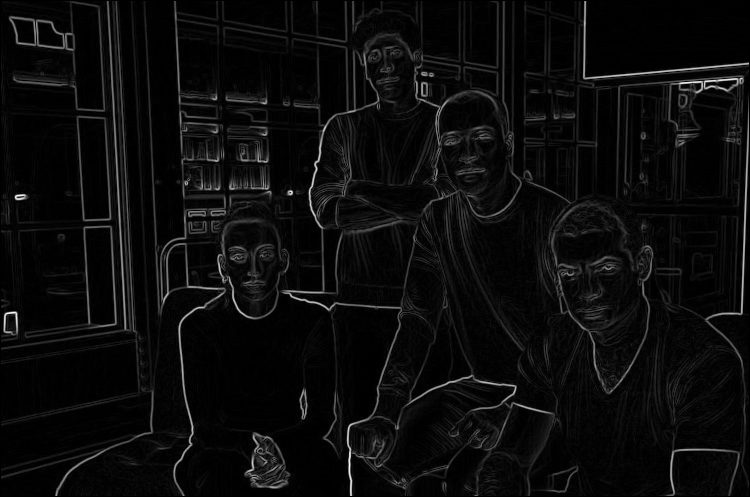

In [6]:
# Завантаження зображення за допомогою PIL
image = Image.open('sam.jpg')  # Вкажіть шлях до вашого зображення
image_array = np.array(image)

# Застосування фільтра Собеля
sobel_image_array = apply_sobel(image_array)

# Створення нового зображення з отриманого масиву
sobel_image = Image.fromarray(sobel_image_array)

# Показ зображення
sobel_image